In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
import seaborn as sns
import numpy as np

In [8]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\worldcities.csv")

In [9]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","")
df=df.loc[:,~df.columns.isin(["iso2","iso3","admin_name","id","city_ascii"])]

# plot quantity of cities by country, for those that have more than 500 cities

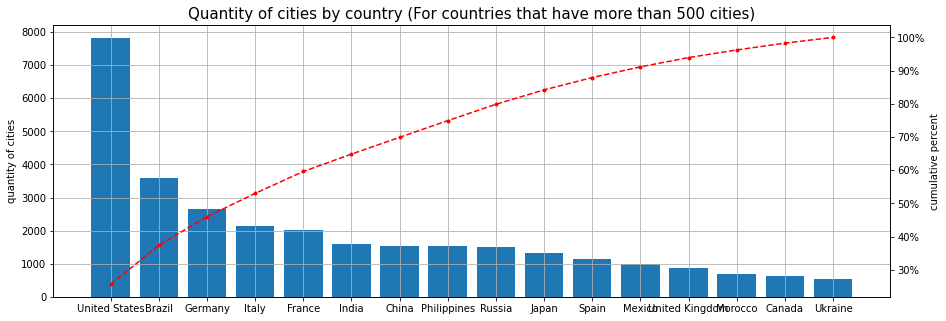

In [10]:
g=df.groupby("country").filter(lambda x:x["city"].count()>500)\
.groupby("country")["city"].count().reset_index().sort_values("city",ascending=False)
g["percent"]=(g["city"]/g.city.sum()*100)
g["cum_percent"]=g.percent.cumsum()

fig,ax1=plt.subplots(figsize=(15,5))
plt.bar(g.country,g.city)
plt.grid(axis="both")
plt.ylabel("quantity of cities")
plt.title("Quantity of cities by country (For countries that have more than 500 cities)",size=15)
ax2=ax1.twinx()
plt.plot(g.country,g.cum_percent,"r.--")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.ylabel("cumulative percent")
plt.show()

# plot the distribution of world cities 

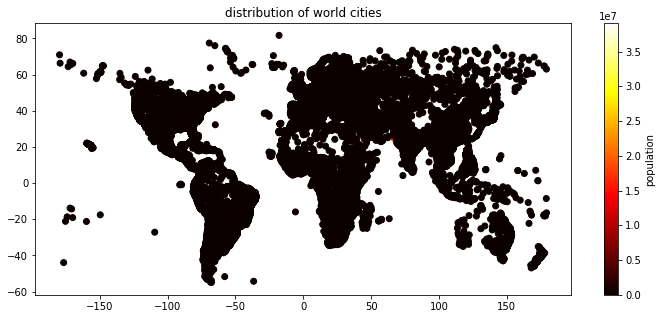

[]

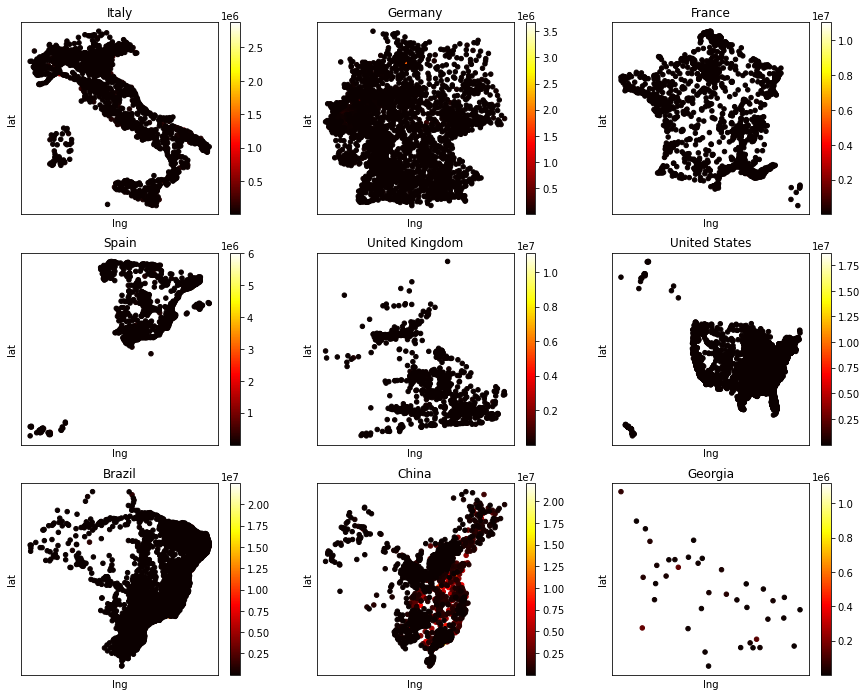

In [59]:
plt.figure(figsize=(12,5))
plt.scatter(df.lng,df.lat,c=df.population,cmap="hot")
plt.title("distribution of world cities")
plt.colorbar().set_label("population")
plt.show()

fig,axes=plt.subplots(3,3,figsize=(15,12))
countries=["Italy","Germany","France","Spain","United Kingdom","United States","Brazil","China","Georgia"]
for ax,country in zip(axes.ravel(),countries):
    filtered=df[df.country==country]
    filtered.plot(kind="scatter",x="lng",y="lat",ax=ax,title=country,c=filtered.population,cmap="hot",xticks=[],yticks=[])
plt.plot()

# find the percentage of urban population for every country

In [12]:
countries=pd.read_html("https://worldpopulationreview.com/countries")[0]

In [13]:
countries.columns=countries.columns.str.strip().str.lower().str.replace(" |km²|()","",regex=True)
countries=countries.rename(columns={"density()":"density"})
countries=countries.loc[:,countries.columns.isin(["country","2022population","growthrate","area","density"])]

In [14]:
newdf=df.merge(countries,how="left",on="country")
newdf=newdf.loc[:,["city","country","population","2022population","growthrate"]]
newdf=newdf.rename(columns={"population":"city_pop","2022population":"country_pop"})

In [24]:
grouped=newdf.groupby("country").agg({"city_pop":"sum","country_pop":"mean"}).reset_index()
grouped["percent"]=grouped.city_pop/grouped.country_pop*100   
grouped["urban_percent"]=(grouped.city_pop/grouped.country_pop*100).round(1)

values=[]
for i in grouped["urban_percent"]:
    if str(i)=="nan":
        values.append(i)
    else:
        i=str(i)+" %"
        values.append(i)
grouped["urban_percent"]=values
grouped.head()

,country,city_pop,country_pop,percent,urban_percent
0,Afghanistan,8595633.0,40754388.0,21.091307,21.1 %
1,Albania,1671434.0,2866374.0,58.311790,58.3 %
2,Algeria,13468224.0,45350148.0,29.698302,29.7 %
3,American Samoa,12576.0,NaN,NaN,NaN
4,Andorra,77354.0,77463.0,99.859288,99.9 %


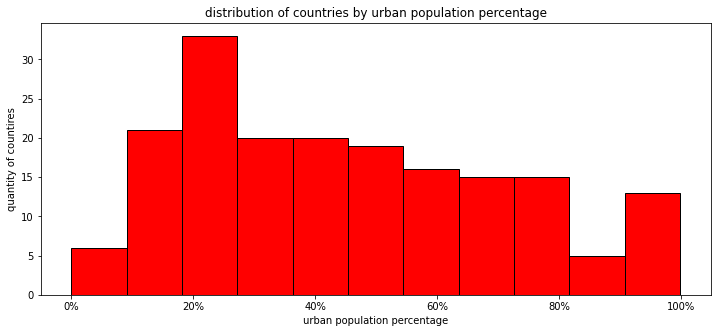

,urban_percent_range,percent
8,"(-0.001, 10.0]",7
1,"(10.0, 20.0]",28
0,"(20.0, 30.0]",35
3,"(30.0, 40.0]",21
5,"(40.0, 50.0]",17
2,"(50.0, 60.0]",22
4,"(60.0, 70.0]",18
6,"(70.0, 80.0]",15
9,"(80.0, 90.0]",7
7,"(90.0, 100.0]",13


In [62]:
plt.figure(figsize=(12,5))
plt.hist(grouped[grouped.percent<=100].percent,bins=11,edgecolor="black",color="r")
plt.title("distribution of countries by urban population percentage")
plt.xlabel("urban population percentage")
plt.ylabel("quantity of countires")
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

bins=grouped.percent.value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100],sort=True,normalize=False).reset_index()
bins.rename(columns={"index":"urban_percent_range"},inplace=True)
bins.sort_values("urban_percent_range")